# Real Hardware Fitting

In [6]:
import sys
sys.path.insert(0, '../../src/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle
import string as str

from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from cost_functions import *
from optimization import *
from quantum_maps import *
from quantum_tools import *
#np.set_printoptions(threshold=sys.maxsize)

## Density Matrix

### Two Qubits, Santiago

In [18]:
input_list, target_list = pickle.load(open("twoQubits_singleBlock.p", "rb"))

n = 2
d = 2**n
rank = 3

circuit = qk.QuantumCircuit(n)
circuit.h(0)
circuit.s(1)
circuit.cnot(0,1)

U1 = Operator(circuit).data

kraus_model = KrausMap(U1, 0.5, d, rank)

model1 = ModelQuantumMap(q_map = kraus_model,
                         cost = state_density_loss,
                         input_list = input_list,
                         target_list = target_list,
                         lr = 0.05, 
                         h = 1e-3)

model1.train(num_iter = 2000, 
             use_adam = True,
             N = 5)

  0%|          | 0/2000 [00:00<?, ?it/s]

0: fid: -0.758, c: 0.512
1: fid: -0.769, c: 0.525
2: fid: -0.780, c: 0.537
3: fid: -0.790, c: 0.550
4: fid: -0.800, c: 0.562
5: fid: -0.811, c: 0.574
6: fid: -0.820, c: 0.586
7: fid: -0.829, c: 0.597
8: fid: -0.838, c: 0.609
9: fid: -0.847, c: 0.620
10: fid: -0.856, c: 0.632
11: fid: -0.864, c: 0.643
12: fid: -0.872, c: 0.653
13: fid: -0.879, c: 0.664
14: fid: -0.886, c: 0.674
15: fid: -0.893, c: 0.684
16: fid: -0.899, c: 0.694
17: fid: -0.905, c: 0.703
18: fid: -0.911, c: 0.712
19: fid: -0.916, c: 0.721
20: fid: -0.921, c: 0.729
21: fid: -0.926, c: 0.738
22: fid: -0.930, c: 0.746
23: fid: -0.934, c: 0.753
24: fid: -0.937, c: 0.760
25: fid: -0.940, c: 0.767
26: fid: -0.943, c: 0.773
27: fid: -0.946, c: 0.779
28: fid: -0.948, c: 0.785
29: fid: -0.950, c: 0.791
30: fid: -0.952, c: 0.796
31: fid: -0.954, c: 0.801
32: fid: -0.956, c: 0.805
33: fid: -0.957, c: 0.810
34: fid: -0.958, c: 0.814
35: fid: -0.960, c: 0.818
36: fid: -0.961, c: 0.821
37: fid: -0.962, c: 0.825
38: fid: -0.963, c: 0.

308: fid: -0.982, c: 0.817
309: fid: -0.982, c: 0.817
310: fid: -0.981, c: 0.817
311: fid: -0.981, c: 0.816
312: fid: -0.981, c: 0.816
313: fid: -0.981, c: 0.815
314: fid: -0.981, c: 0.814
315: fid: -0.981, c: 0.814
316: fid: -0.981, c: 0.813
317: fid: -0.981, c: 0.813
318: fid: -0.981, c: 0.812
319: fid: -0.981, c: 0.812
320: fid: -0.982, c: 0.811
321: fid: -0.982, c: 0.811
322: fid: -0.982, c: 0.810
323: fid: -0.982, c: 0.810
324: fid: -0.982, c: 0.810
325: fid: -0.982, c: 0.809
326: fid: -0.982, c: 0.809
327: fid: -0.982, c: 0.809
328: fid: -0.982, c: 0.808
329: fid: -0.982, c: 0.808
330: fid: -0.982, c: 0.808
331: fid: -0.982, c: 0.807
332: fid: -0.982, c: 0.807
333: fid: -0.982, c: 0.806
334: fid: -0.982, c: 0.806
335: fid: -0.982, c: 0.805
336: fid: -0.982, c: 0.805
337: fid: -0.982, c: 0.804
338: fid: -0.982, c: 0.804
339: fid: -0.982, c: 0.803
340: fid: -0.982, c: 0.803
341: fid: -0.982, c: 0.803
342: fid: -0.982, c: 0.802
343: fid: -0.982, c: 0.802
344: fid: -0.982, c: 0.802
3

612: fid: -0.985, c: 0.602
613: fid: -0.985, c: 0.601
614: fid: -0.985, c: 0.601
615: fid: -0.985, c: 0.601
616: fid: -0.985, c: 0.601
617: fid: -0.985, c: 0.600
618: fid: -0.985, c: 0.600
619: fid: -0.985, c: 0.600
620: fid: -0.985, c: 0.600
621: fid: -0.985, c: 0.600
622: fid: -0.985, c: 0.599
623: fid: -0.985, c: 0.599
624: fid: -0.985, c: 0.599
625: fid: -0.985, c: 0.599
626: fid: -0.985, c: 0.598
627: fid: -0.985, c: 0.598
628: fid: -0.985, c: 0.597
629: fid: -0.985, c: 0.597
630: fid: -0.985, c: 0.596
631: fid: -0.985, c: 0.596
632: fid: -0.985, c: 0.596
633: fid: -0.985, c: 0.595
634: fid: -0.985, c: 0.595
635: fid: -0.985, c: 0.594
636: fid: -0.985, c: 0.594
637: fid: -0.985, c: 0.593
638: fid: -0.985, c: 0.592
639: fid: -0.985, c: 0.592
640: fid: -0.985, c: 0.591
641: fid: -0.985, c: 0.591
642: fid: -0.985, c: 0.590
643: fid: -0.985, c: 0.590
644: fid: -0.985, c: 0.589
645: fid: -0.985, c: 0.588
646: fid: -0.986, c: 0.587
647: fid: -0.986, c: 0.586
648: fid: -0.986, c: 0.586
6

916: fid: -0.986, c: 0.515
917: fid: -0.986, c: 0.514
918: fid: -0.986, c: 0.514
919: fid: -0.986, c: 0.512
920: fid: -0.986, c: 0.511
921: fid: -0.986, c: 0.510
922: fid: -0.986, c: 0.509
923: fid: -0.986, c: 0.508
924: fid: -0.986, c: 0.508
925: fid: -0.986, c: 0.507
926: fid: -0.986, c: 0.507
927: fid: -0.986, c: 0.506
928: fid: -0.986, c: 0.506
929: fid: -0.986, c: 0.505
930: fid: -0.986, c: 0.505
931: fid: -0.986, c: 0.505
932: fid: -0.986, c: 0.505
933: fid: -0.986, c: 0.505
934: fid: -0.986, c: 0.505
935: fid: -0.986, c: 0.506
936: fid: -0.986, c: 0.506
937: fid: -0.986, c: 0.506
938: fid: -0.986, c: 0.506
939: fid: -0.986, c: 0.506
940: fid: -0.986, c: 0.505
941: fid: -0.986, c: 0.504
942: fid: -0.986, c: 0.504
943: fid: -0.986, c: 0.503
944: fid: -0.986, c: 0.503
945: fid: -0.986, c: 0.502
946: fid: -0.986, c: 0.501
947: fid: -0.986, c: 0.500
948: fid: -0.986, c: 0.500
949: fid: -0.986, c: 0.499
950: fid: -0.986, c: 0.499
951: fid: -0.986, c: 0.498
952: fid: -0.986, c: 0.497
9

1212: fid: -0.986, c: 0.456
1213: fid: -0.986, c: 0.456
1214: fid: -0.986, c: 0.456
1215: fid: -0.986, c: 0.455
1216: fid: -0.986, c: 0.455
1217: fid: -0.986, c: 0.455
1218: fid: -0.986, c: 0.455
1219: fid: -0.986, c: 0.454
1220: fid: -0.986, c: 0.453
1221: fid: -0.986, c: 0.452
1222: fid: -0.986, c: 0.451
1223: fid: -0.986, c: 0.451
1224: fid: -0.986, c: 0.450
1225: fid: -0.986, c: 0.449
1226: fid: -0.986, c: 0.449
1227: fid: -0.986, c: 0.450
1228: fid: -0.986, c: 0.450
1229: fid: -0.986, c: 0.451
1230: fid: -0.986, c: 0.451
1231: fid: -0.986, c: 0.452
1232: fid: -0.987, c: 0.453
1233: fid: -0.987, c: 0.454
1234: fid: -0.987, c: 0.456
1235: fid: -0.987, c: 0.457
1236: fid: -0.987, c: 0.458
1237: fid: -0.987, c: 0.459
1238: fid: -0.987, c: 0.460
1239: fid: -0.987, c: 0.460
1240: fid: -0.987, c: 0.459
1241: fid: -0.987, c: 0.459
1242: fid: -0.987, c: 0.458
1243: fid: -0.987, c: 0.457
1244: fid: -0.987, c: 0.456
1245: fid: -0.987, c: 0.455
1246: fid: -0.987, c: 0.455
1247: fid: -0.987, c

1505: fid: -0.987, c: 0.449
1506: fid: -0.987, c: 0.450
1507: fid: -0.987, c: 0.450
1508: fid: -0.987, c: 0.449
1509: fid: -0.987, c: 0.447
1510: fid: -0.987, c: 0.447
1511: fid: -0.987, c: 0.445
1512: fid: -0.987, c: 0.445
1513: fid: -0.987, c: 0.444
1514: fid: -0.987, c: 0.444
1515: fid: -0.987, c: 0.444
1516: fid: -0.987, c: 0.445
1517: fid: -0.987, c: 0.445
1518: fid: -0.987, c: 0.445
1519: fid: -0.987, c: 0.445
1520: fid: -0.987, c: 0.446
1521: fid: -0.987, c: 0.446
1522: fid: -0.987, c: 0.446
1523: fid: -0.987, c: 0.446
1524: fid: -0.987, c: 0.446
1525: fid: -0.987, c: 0.447
1526: fid: -0.987, c: 0.447
1527: fid: -0.987, c: 0.448
1528: fid: -0.987, c: 0.449
1529: fid: -0.987, c: 0.450
1530: fid: -0.987, c: 0.450
1531: fid: -0.987, c: 0.451
1532: fid: -0.987, c: 0.452
1533: fid: -0.987, c: 0.452
1534: fid: -0.987, c: 0.452
1535: fid: -0.987, c: 0.452
1536: fid: -0.987, c: 0.452
1537: fid: -0.987, c: 0.452
1538: fid: -0.987, c: 0.451
1539: fid: -0.987, c: 0.450
1540: fid: -0.987, c

1798: fid: -0.987, c: 0.413
1799: fid: -0.987, c: 0.412
1800: fid: -0.987, c: 0.411
1801: fid: -0.987, c: 0.411
1802: fid: -0.987, c: 0.410
1803: fid: -0.987, c: 0.410
1804: fid: -0.987, c: 0.409
1805: fid: -0.987, c: 0.408
1806: fid: -0.987, c: 0.407
1807: fid: -0.987, c: 0.407
1808: fid: -0.987, c: 0.407
1809: fid: -0.987, c: 0.407
1810: fid: -0.987, c: 0.407
1811: fid: -0.987, c: 0.408
1812: fid: -0.987, c: 0.407
1813: fid: -0.987, c: 0.407
1814: fid: -0.987, c: 0.409
1815: fid: -0.987, c: 0.410
1816: fid: -0.987, c: 0.411
1817: fid: -0.987, c: 0.412
1818: fid: -0.987, c: 0.413
1819: fid: -0.987, c: 0.412
1820: fid: -0.987, c: 0.412
1821: fid: -0.987, c: 0.413
1822: fid: -0.987, c: 0.414
1823: fid: -0.987, c: 0.415
1824: fid: -0.987, c: 0.416
1825: fid: -0.987, c: 0.417
1826: fid: -0.987, c: 0.418
1827: fid: -0.987, c: 0.419
1828: fid: -0.987, c: 0.420
1829: fid: -0.987, c: 0.421
1830: fid: -0.987, c: 0.421
1831: fid: -0.987, c: 0.421
1832: fid: -0.987, c: 0.421
1833: fid: -0.987, c

### Three Qubits, Santiago

In [19]:
input_list, target_list = pickle.load(open("threeQubits_singleBlock.p", "rb"))

n = 3
d = 2**n
rank = 7

circuit = qk.QuantumCircuit(n)
circuit.h(0)
circuit.s(1)
circuit.cnot(0,1)
circuit.h(1)
circuit.s(2)
circuit.cnot(1,2)
1
U1 = Operator(circuit).data

kraus_model = KrausMap(U1, 0.5, d, rank)

model1 = ModelQuantumMap(q_map = kraus_model,
                         cost = state_density_loss,
                         input_list = input_list,
                         target_list = target_list,
                         lr = 0.05, 
                         h = 1e-3)

model1.train(num_iter = 2000, 
             use_adam = True,
             N = 5)

  0%|          | 0/2000 [00:00<?, ?it/s]

0: fid: -0.756, c: 0.512
1: fid: -0.767, c: 0.525
2: fid: -0.777, c: 0.537
3: fid: -0.786, c: 0.550
4: fid: -0.795, c: 0.562
5: fid: -0.804, c: 0.574
6: fid: -0.813, c: 0.586
7: fid: -0.821, c: 0.598
8: fid: -0.829, c: 0.609
9: fid: -0.836, c: 0.621
10: fid: -0.843, c: 0.632
11: fid: -0.850, c: 0.643
12: fid: -0.856, c: 0.653
13: fid: -0.862, c: 0.664
14: fid: -0.867, c: 0.673
15: fid: -0.872, c: 0.683
16: fid: -0.877, c: 0.692
17: fid: -0.881, c: 0.701
18: fid: -0.885, c: 0.709
19: fid: -0.889, c: 0.717
20: fid: -0.892, c: 0.725
21: fid: -0.895, c: 0.732
22: fid: -0.898, c: 0.739
23: fid: -0.901, c: 0.746
24: fid: -0.903, c: 0.752
25: fid: -0.905, c: 0.759
26: fid: -0.907, c: 0.764
27: fid: -0.909, c: 0.770
28: fid: -0.910, c: 0.775
29: fid: -0.912, c: 0.780
30: fid: -0.913, c: 0.784
31: fid: -0.914, c: 0.788
32: fid: -0.915, c: 0.792
33: fid: -0.916, c: 0.796
34: fid: -0.917, c: 0.799
35: fid: -0.918, c: 0.802
36: fid: -0.919, c: 0.805
37: fid: -0.919, c: 0.807
38: fid: -0.920, c: 0.

308: fid: -0.971, c: 0.464
309: fid: -0.971, c: 0.462
310: fid: -0.971, c: 0.460
311: fid: -0.971, c: 0.458
312: fid: -0.971, c: 0.456
313: fid: -0.971, c: 0.454
314: fid: -0.971, c: 0.451
315: fid: -0.971, c: 0.449
316: fid: -0.971, c: 0.447
317: fid: -0.971, c: 0.446
318: fid: -0.971, c: 0.444
319: fid: -0.971, c: 0.441
320: fid: -0.971, c: 0.439
321: fid: -0.971, c: 0.438
322: fid: -0.971, c: 0.436
323: fid: -0.971, c: 0.434
324: fid: -0.971, c: 0.432
325: fid: -0.972, c: 0.430
326: fid: -0.972, c: 0.428
327: fid: -0.972, c: 0.426
328: fid: -0.972, c: 0.424
329: fid: -0.972, c: 0.422
330: fid: -0.972, c: 0.420
331: fid: -0.972, c: 0.418
332: fid: -0.972, c: 0.415
333: fid: -0.972, c: 0.413
334: fid: -0.972, c: 0.411
335: fid: -0.972, c: 0.409
336: fid: -0.972, c: 0.407
337: fid: -0.972, c: 0.404
338: fid: -0.973, c: 0.402
339: fid: -0.973, c: 0.400
340: fid: -0.973, c: 0.398
341: fid: -0.973, c: 0.396
342: fid: -0.973, c: 0.393
343: fid: -0.973, c: 0.391
344: fid: -0.973, c: 0.388
3

612: fid: -0.976, c: 0.206
613: fid: -0.976, c: 0.205
614: fid: -0.976, c: 0.205
615: fid: -0.976, c: 0.205
616: fid: -0.976, c: 0.205
617: fid: -0.976, c: 0.204
618: fid: -0.976, c: 0.204
619: fid: -0.976, c: 0.203
620: fid: -0.976, c: 0.203
621: fid: -0.976, c: 0.203
622: fid: -0.976, c: 0.202
623: fid: -0.976, c: 0.202
624: fid: -0.976, c: 0.202
625: fid: -0.976, c: 0.202
626: fid: -0.976, c: 0.202
627: fid: -0.976, c: 0.202
628: fid: -0.976, c: 0.202
629: fid: -0.976, c: 0.202
630: fid: -0.976, c: 0.201
631: fid: -0.976, c: 0.201
632: fid: -0.976, c: 0.201
633: fid: -0.976, c: 0.201
634: fid: -0.976, c: 0.201
635: fid: -0.976, c: 0.200
636: fid: -0.976, c: 0.200
637: fid: -0.976, c: 0.200
638: fid: -0.976, c: 0.199
639: fid: -0.977, c: 0.199
640: fid: -0.977, c: 0.199
641: fid: -0.977, c: 0.198
642: fid: -0.977, c: 0.198
643: fid: -0.977, c: 0.198
644: fid: -0.977, c: 0.197
645: fid: -0.977, c: 0.197
646: fid: -0.977, c: 0.197
647: fid: -0.976, c: 0.196
648: fid: -0.976, c: 0.196
6

916: fid: -0.977, c: 0.169
917: fid: -0.977, c: 0.169
918: fid: -0.977, c: 0.169
919: fid: -0.977, c: 0.169
920: fid: -0.977, c: 0.169
921: fid: -0.977, c: 0.169
922: fid: -0.977, c: 0.169
923: fid: -0.977, c: 0.169
924: fid: -0.977, c: 0.169
925: fid: -0.977, c: 0.169
926: fid: -0.977, c: 0.168
927: fid: -0.977, c: 0.168
928: fid: -0.977, c: 0.168
929: fid: -0.977, c: 0.168
930: fid: -0.977, c: 0.168
931: fid: -0.977, c: 0.168
932: fid: -0.977, c: 0.168
933: fid: -0.977, c: 0.167
934: fid: -0.977, c: 0.167
935: fid: -0.977, c: 0.167
936: fid: -0.977, c: 0.166
937: fid: -0.977, c: 0.166
938: fid: -0.977, c: 0.166
939: fid: -0.977, c: 0.166
940: fid: -0.977, c: 0.166
941: fid: -0.977, c: 0.166
942: fid: -0.977, c: 0.166
943: fid: -0.977, c: 0.166
944: fid: -0.977, c: 0.166
945: fid: -0.977, c: 0.166
946: fid: -0.977, c: 0.166
947: fid: -0.977, c: 0.166
948: fid: -0.977, c: 0.166
949: fid: -0.977, c: 0.165
950: fid: -0.977, c: 0.165
951: fid: -0.977, c: 0.165
952: fid: -0.977, c: 0.165
9

1212: fid: -0.977, c: 0.150
1213: fid: -0.977, c: 0.150
1214: fid: -0.977, c: 0.150
1215: fid: -0.977, c: 0.150
1216: fid: -0.977, c: 0.151
1217: fid: -0.977, c: 0.151
1218: fid: -0.977, c: 0.151
1219: fid: -0.977, c: 0.151
1220: fid: -0.977, c: 0.151
1221: fid: -0.977, c: 0.151
1222: fid: -0.977, c: 0.151
1223: fid: -0.977, c: 0.151
1224: fid: -0.977, c: 0.151
1225: fid: -0.977, c: 0.152
1226: fid: -0.977, c: 0.152
1227: fid: -0.977, c: 0.152
1228: fid: -0.977, c: 0.152
1229: fid: -0.977, c: 0.152
1230: fid: -0.977, c: 0.152
1231: fid: -0.977, c: 0.152
1232: fid: -0.977, c: 0.152
1233: fid: -0.977, c: 0.152
1234: fid: -0.977, c: 0.152
1235: fid: -0.977, c: 0.152
1236: fid: -0.977, c: 0.152
1237: fid: -0.977, c: 0.151
1238: fid: -0.977, c: 0.151
1239: fid: -0.977, c: 0.151
1240: fid: -0.977, c: 0.151
1241: fid: -0.977, c: 0.151
1242: fid: -0.977, c: 0.151
1243: fid: -0.977, c: 0.151
1244: fid: -0.977, c: 0.151
1245: fid: -0.978, c: 0.151
1246: fid: -0.978, c: 0.150
1247: fid: -0.978, c

1505: fid: -0.977, c: 0.137
1506: fid: -0.977, c: 0.137
1507: fid: -0.977, c: 0.137
1508: fid: -0.977, c: 0.137
1509: fid: -0.977, c: 0.137
1510: fid: -0.977, c: 0.137
1511: fid: -0.977, c: 0.137
1512: fid: -0.977, c: 0.137
1513: fid: -0.977, c: 0.137
1514: fid: -0.977, c: 0.137
1515: fid: -0.977, c: 0.137
1516: fid: -0.977, c: 0.137
1517: fid: -0.977, c: 0.137
1518: fid: -0.977, c: 0.137
1519: fid: -0.977, c: 0.138
1520: fid: -0.977, c: 0.138
1521: fid: -0.977, c: 0.138
1522: fid: -0.977, c: 0.138
1523: fid: -0.977, c: 0.138
1524: fid: -0.977, c: 0.139
1525: fid: -0.977, c: 0.139
1526: fid: -0.977, c: 0.139
1527: fid: -0.977, c: 0.139
1528: fid: -0.977, c: 0.139
1529: fid: -0.977, c: 0.140
1530: fid: -0.977, c: 0.140
1531: fid: -0.977, c: 0.140
1532: fid: -0.977, c: 0.139
1533: fid: -0.977, c: 0.140
1534: fid: -0.977, c: 0.140
1535: fid: -0.977, c: 0.140
1536: fid: -0.977, c: 0.140
1537: fid: -0.977, c: 0.140
1538: fid: -0.977, c: 0.140
1539: fid: -0.977, c: 0.141
1540: fid: -0.977, c

1798: fid: -0.977, c: 0.132
1799: fid: -0.977, c: 0.132
1800: fid: -0.977, c: 0.133
1801: fid: -0.977, c: 0.133
1802: fid: -0.977, c: 0.133
1803: fid: -0.977, c: 0.133
1804: fid: -0.977, c: 0.133
1805: fid: -0.977, c: 0.133
1806: fid: -0.977, c: 0.133
1807: fid: -0.977, c: 0.133
1808: fid: -0.977, c: 0.133
1809: fid: -0.978, c: 0.133
1810: fid: -0.978, c: 0.133
1811: fid: -0.978, c: 0.133
1812: fid: -0.978, c: 0.134
1813: fid: -0.978, c: 0.134
1814: fid: -0.978, c: 0.134
1815: fid: -0.978, c: 0.135
1816: fid: -0.978, c: 0.135
1817: fid: -0.978, c: 0.135
1818: fid: -0.978, c: 0.136
1819: fid: -0.978, c: 0.136
1820: fid: -0.978, c: 0.136
1821: fid: -0.978, c: 0.136
1822: fid: -0.978, c: 0.136
1823: fid: -0.978, c: 0.136
1824: fid: -0.978, c: 0.136
1825: fid: -0.978, c: 0.136
1826: fid: -0.978, c: 0.135
1827: fid: -0.978, c: 0.135
1828: fid: -0.978, c: 0.135
1829: fid: -0.978, c: 0.134
1830: fid: -0.978, c: 0.134
1831: fid: -0.977, c: 0.134
1832: fid: -0.977, c: 0.133
1833: fid: -0.977, c

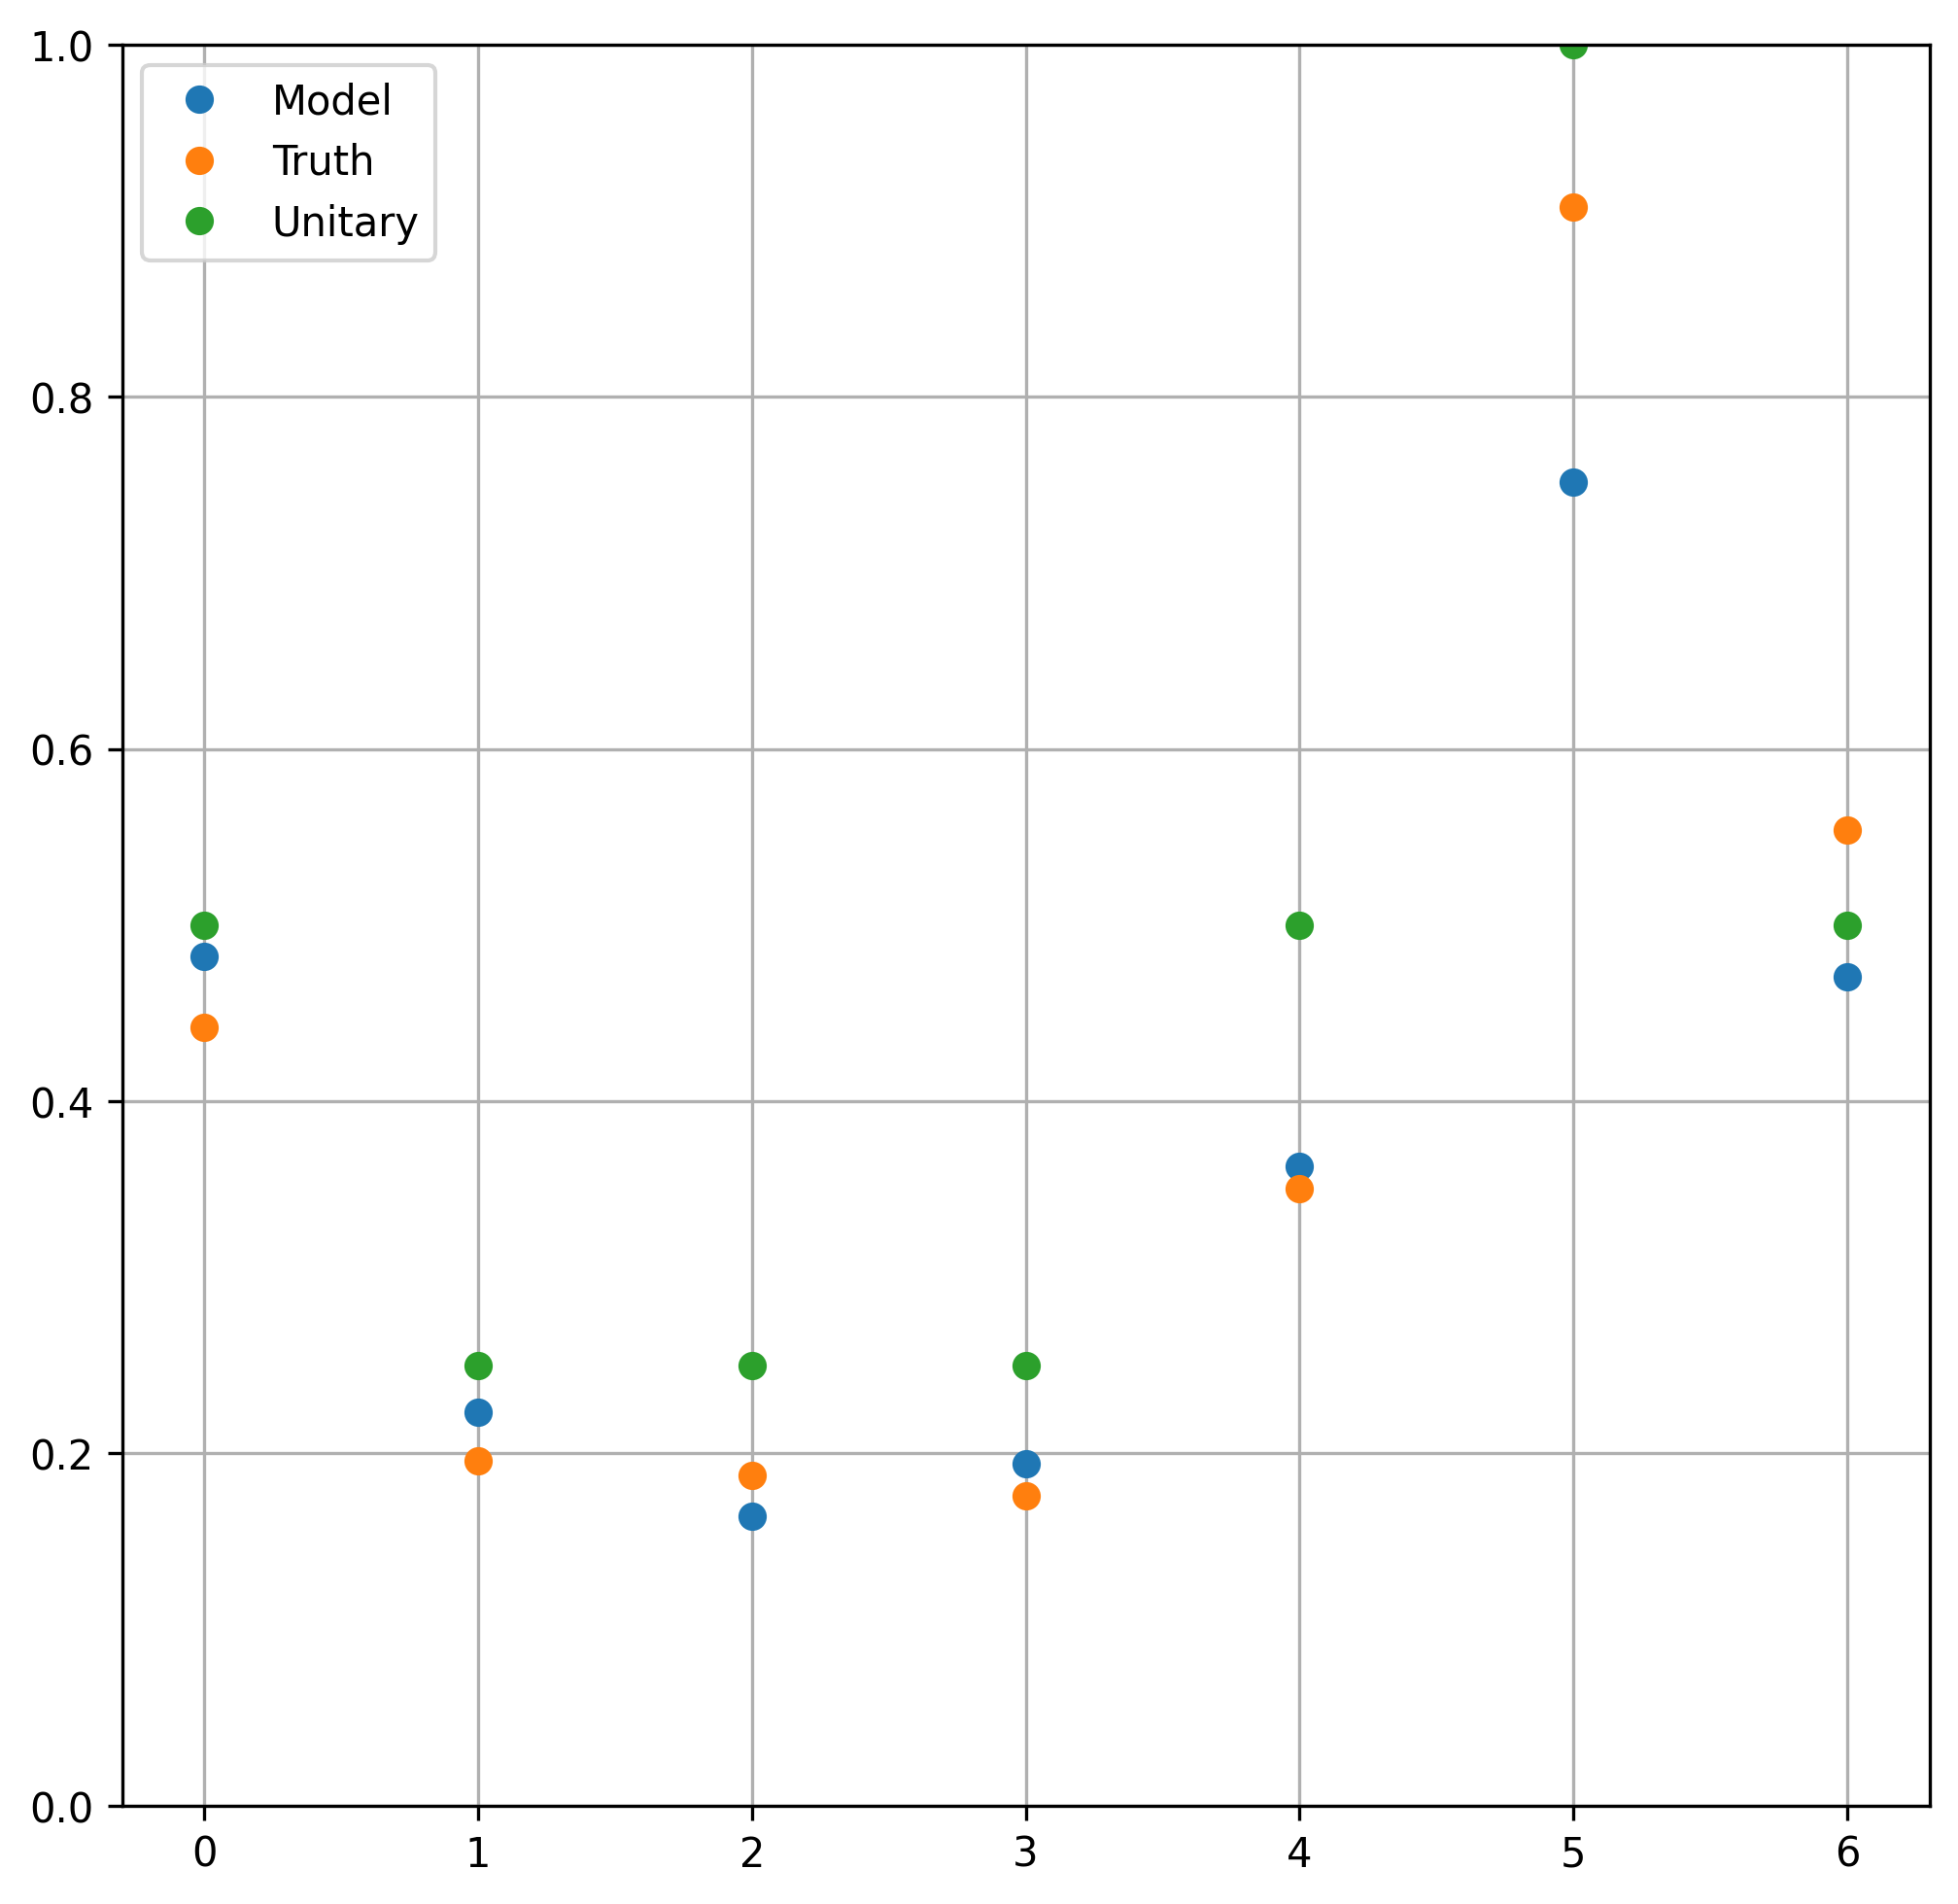

In [25]:
fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
plt.plot([output_1, output_2, output_3, output_4, output_5, output_6, output_7], "o")
plt.plot([truth_1, truth_2, truth_3, truth_4, truth_5, truth_6, truth_7], "o")
plt.plot([unitary_result1, unitary_result2, unitary_result3, unitary_result4, unitary_result5, unitary_result6, unitary_result7], "o")
plt.legend(["Model", "Truth", "Unitary"])
plt.ylim([0,1])
plt.grid()
plt.show()

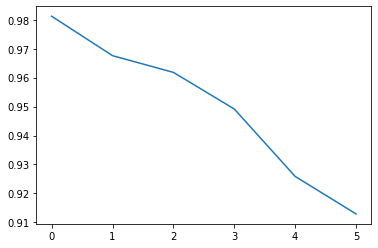

In [24]:
plt.plot(fid_mean)

## Expectation Value

### Two Qubits, Santiago

In [10]:
input_list, target_list = pickle.load(open("..\..\data\twoQubits_ost.p", "rb"))

n = 2
d = 2**n
rank = 1

circuit = qk.QuantumCircuit(n)
circuit.h(0)
circuit.s(1)
circuit.cnot(0,1)
#circuit.h(1)
#circuit.s(2)
#circuit.cnot(1,2)
U = Operator(circuit).data

kraus_model = KrausMap(U, 0.1, d, rank)

model = ModelQuantumMap(q_map = kraus_model,
                        cost = expectation_value_loss,
                        input_list = input_list,
                        target_list = target_list,
                        lr = 0.05, 
                        h = 1e-3)

model.train(num_iter = 2000, 
            use_adam = True,
            N = 10)

  0%|          | 0/2000 [00:00<?, ?it/s]

0: fid: 0.344, c: 0.105
1: fid: 0.336, c: 0.109
2: fid: 0.329, c: 0.114
3: fid: 0.319, c: 0.119
4: fid: 0.312, c: 0.125
5: fid: 0.305, c: 0.130
6: fid: 0.298, c: 0.136
7: fid: 0.292, c: 0.142
8: fid: 0.284, c: 0.148
9: fid: 0.279, c: 0.154
10: fid: 0.273, c: 0.161
11: fid: 0.269, c: 0.167
12: fid: 0.262, c: 0.174
13: fid: 0.254, c: 0.181
14: fid: 0.245, c: 0.189
15: fid: 0.235, c: 0.197
16: fid: 0.225, c: 0.205
17: fid: 0.213, c: 0.213
18: fid: 0.204, c: 0.221
19: fid: 0.197, c: 0.230
20: fid: 0.190, c: 0.238
21: fid: 0.184, c: 0.247
22: fid: 0.179, c: 0.256
23: fid: 0.173, c: 0.265
24: fid: 0.167, c: 0.275
25: fid: 0.161, c: 0.285
26: fid: 0.155, c: 0.295
27: fid: 0.148, c: 0.305
28: fid: 0.141, c: 0.316
29: fid: 0.135, c: 0.327
30: fid: 0.129, c: 0.338
31: fid: 0.123, c: 0.350
32: fid: 0.118, c: 0.360
33: fid: 0.112, c: 0.371
34: fid: 0.108, c: 0.381
35: fid: 0.103, c: 0.392
36: fid: 0.099, c: 0.402
37: fid: 0.095, c: 0.413
38: fid: 0.091, c: 0.423
39: fid: 0.088, c: 0.433
40: fid: 0

320: fid: 0.001, c: 0.932
321: fid: 0.001, c: 0.932
322: fid: 0.001, c: 0.932
323: fid: 0.001, c: 0.932
324: fid: 0.001, c: 0.933
325: fid: 0.001, c: 0.933
326: fid: 0.001, c: 0.933
327: fid: 0.001, c: 0.933
328: fid: 0.001, c: 0.933
329: fid: 0.001, c: 0.933
330: fid: 0.001, c: 0.934
331: fid: 0.001, c: 0.934
332: fid: 0.001, c: 0.934
333: fid: 0.001, c: 0.934
334: fid: 0.001, c: 0.934
335: fid: 0.001, c: 0.934
336: fid: 0.001, c: 0.935
337: fid: 0.001, c: 0.935
338: fid: 0.001, c: 0.935
339: fid: 0.001, c: 0.935
340: fid: 0.001, c: 0.935
341: fid: 0.001, c: 0.935
342: fid: 0.001, c: 0.936
343: fid: 0.001, c: 0.936
344: fid: 0.001, c: 0.936
345: fid: 0.001, c: 0.936
346: fid: 0.001, c: 0.936
347: fid: 0.001, c: 0.936
348: fid: 0.001, c: 0.936
349: fid: 0.001, c: 0.937
350: fid: 0.001, c: 0.937
351: fid: 0.001, c: 0.937
352: fid: 0.001, c: 0.937
353: fid: 0.001, c: 0.937
354: fid: 0.001, c: 0.937
355: fid: 0.001, c: 0.938
356: fid: 0.001, c: 0.938
357: fid: 0.001, c: 0.938
358: fid: 0.

KeyboardInterrupt: 

In [ ]:
input_list, target_list = pickle.load(open("..\..\data\threeQubits_expectation.p", "rb"))

n = 3
d = 2**n
rank = 1

circuit = qk.QuantumCircuit(n)
circuit.h(0)
circuit.s(1)
circuit.cnot(0,1)
circuit.h(1)
circuit.s(2)
circuit.cnot(1,2)
U = Operator(circuit).data

kraus_model = KrausMap(U, 0.1, d, rank)

model = ModelQuantumMap(q_map = kraus_model,
                        cost = expectation_value_loss,
                        input_list = input_list,
                        target_list = target_list,
                        lr = 0.05, 
                        h = 1e-3)

model.train(num_iter = 2000, 
            use_adam = True,
            N = 10)

  0%|          | 0/2000 [00:00<?, ?it/s]

0: fid: 0.161, c: 0.105
1: fid: 0.157, c: 0.109
2: fid: 0.156, c: 0.113
3: fid: 0.155, c: 0.117
4: fid: 0.155, c: 0.121
5: fid: 0.154, c: 0.125
6: fid: 0.153, c: 0.129
7: fid: 0.151, c: 0.134
8: fid: 0.149, c: 0.138
9: fid: 0.147, c: 0.143
10: fid: 0.145, c: 0.147
11: fid: 0.143, c: 0.152
12: fid: 0.141, c: 0.157
13: fid: 0.139, c: 0.163
14: fid: 0.136, c: 0.169
15: fid: 0.134, c: 0.175
16: fid: 0.132, c: 0.181
17: fid: 0.129, c: 0.187
18: fid: 0.127, c: 0.194
19: fid: 0.124, c: 0.200
20: fid: 0.122, c: 0.207
21: fid: 0.120, c: 0.214
22: fid: 0.117, c: 0.221
23: fid: 0.115, c: 0.228
24: fid: 0.113, c: 0.235
25: fid: 0.111, c: 0.243
26: fid: 0.108, c: 0.252
27: fid: 0.106, c: 0.261
28: fid: 0.103, c: 0.271
29: fid: 0.100, c: 0.282
30: fid: 0.097, c: 0.292
31: fid: 0.095, c: 0.303
32: fid: 0.092, c: 0.313
33: fid: 0.089, c: 0.324
34: fid: 0.086, c: 0.335
35: fid: 0.083, c: 0.345
36: fid: 0.080, c: 0.357
37: fid: 0.077, c: 0.368
38: fid: 0.074, c: 0.381
39: fid: 0.071, c: 0.393
40: fid: 0